In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']

In [8]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: >

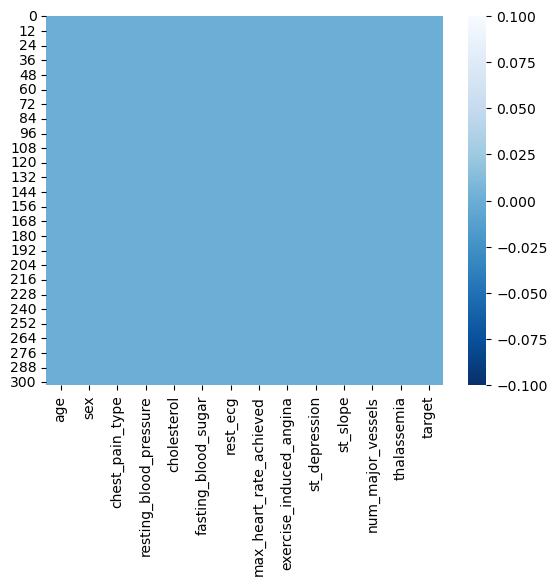

In [10]:
sns.heatmap(data.isnull(),cbar=True,cmap="Blues_r")

In [11]:
## to check for outliers in the dataset (univarite Analysis)

In [12]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='age'>

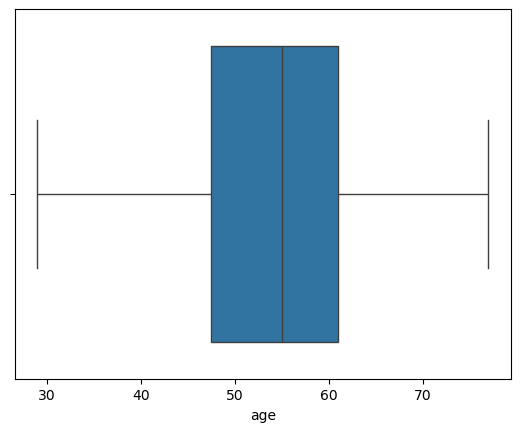

In [13]:
sns.boxplot(x=data["age"])

<Axes: xlabel='sex'>

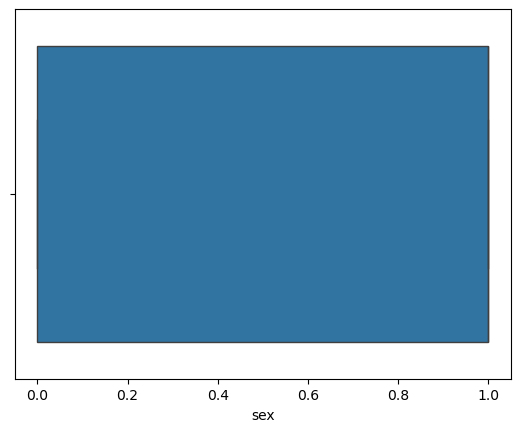

In [14]:
sns.boxplot(x=data["sex"])

<Axes: xlabel='chest_pain_type'>

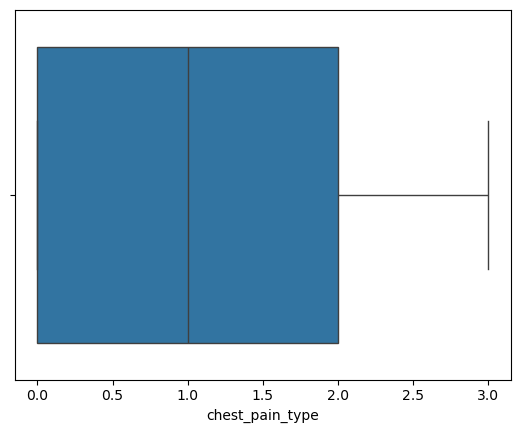

In [15]:
sns.boxplot(x=data["chest_pain_type"])

<Axes: xlabel='resting_blood_pressure'>

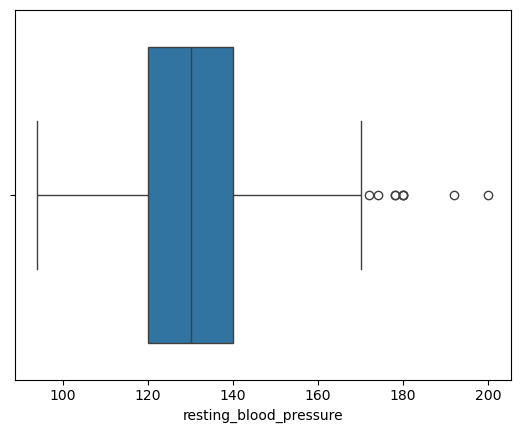

In [16]:
sns.boxplot(x=data["resting_blood_pressure"])

<Axes: xlabel='cholesterol'>

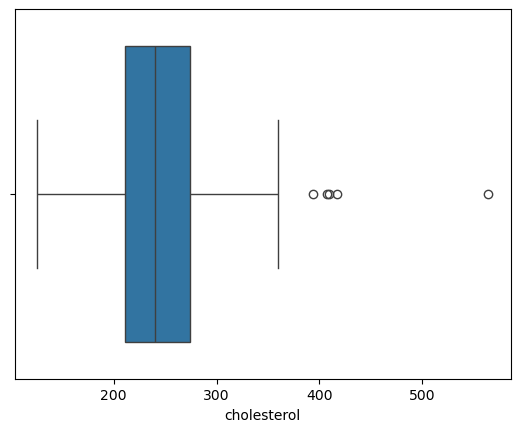

In [17]:
sns.boxplot(x=data["cholesterol"])

<Axes: xlabel='fasting_blood_sugar'>

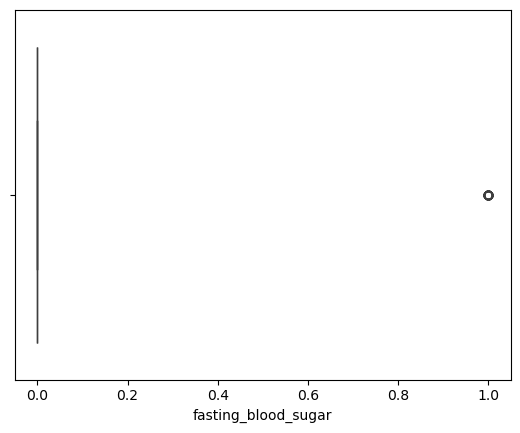

In [18]:
sns.boxplot(x=data["fasting_blood_sugar"])

<Axes: xlabel='rest_ecg'>

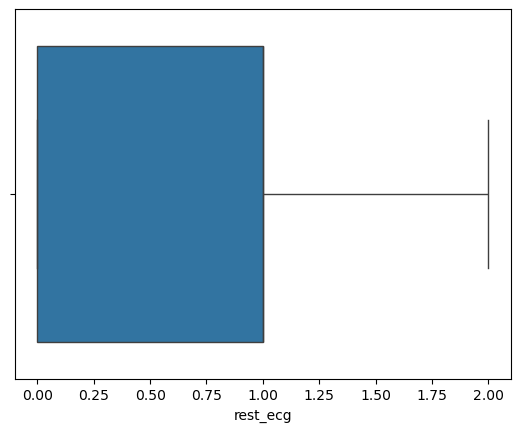

In [19]:
sns.boxplot(x=data["rest_ecg"])

<Axes: xlabel='max_heart_rate_achieved'>

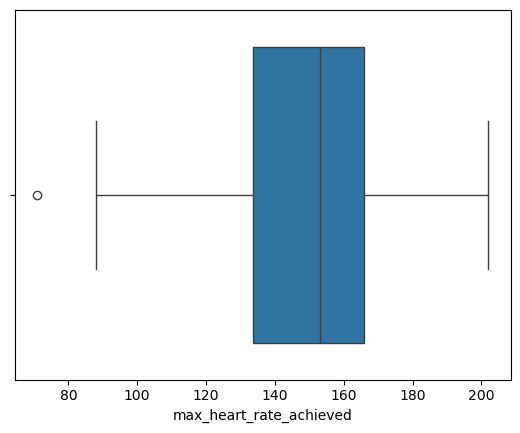

In [20]:
sns.boxplot(x=data["max_heart_rate_achieved"])

<Axes: xlabel='exercise_induced_angina'>

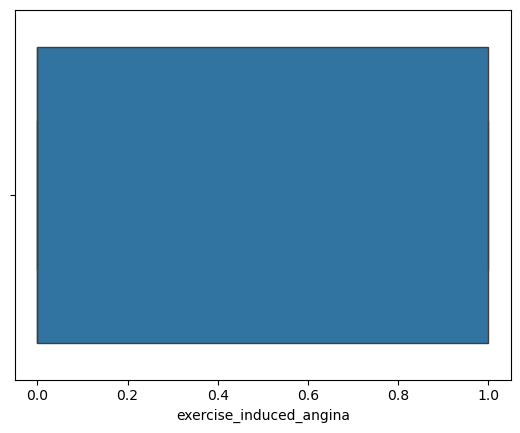

In [21]:
sns.boxplot(x=data["exercise_induced_angina"])

<Axes: xlabel='st_depression'>

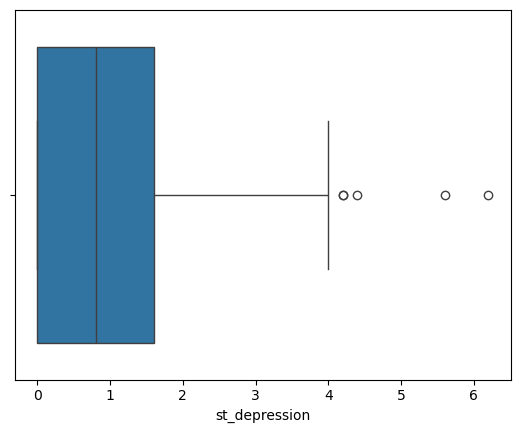

In [22]:
sns.boxplot(x=data["st_depression"])

<Axes: xlabel='st_slope'>

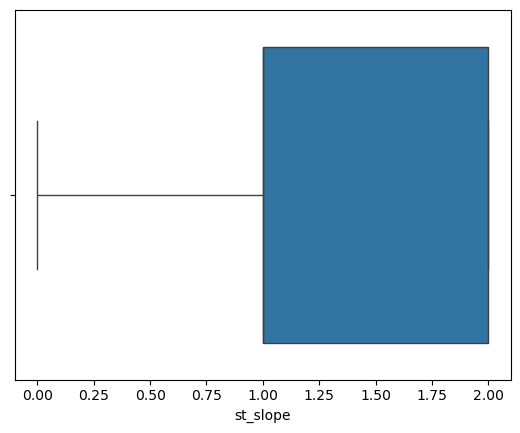

In [23]:
sns.boxplot(x=data["st_slope"])

<Axes: xlabel='num_major_vessels'>

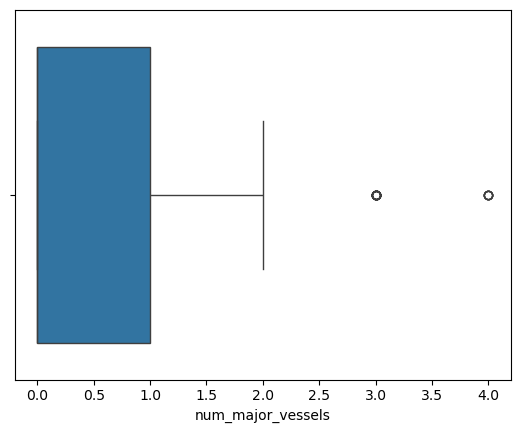

In [24]:
sns.boxplot(x=data["num_major_vessels"])

<Axes: xlabel='thalassemia'>

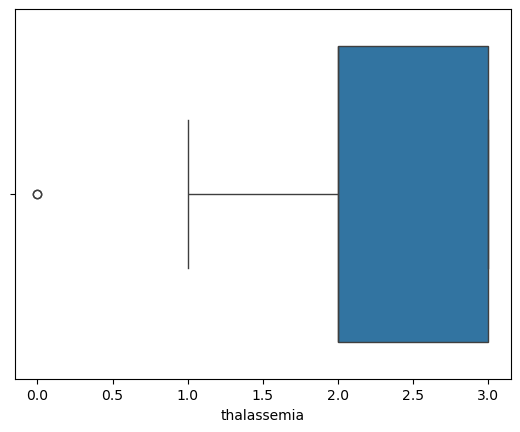

In [25]:
sns.boxplot(x=data["thalassemia"])

In [26]:
## Data visulization
####create age bracket
def age_bracket(age):
    if age <=35:
     return "Youth(<=35)"
    elif age <=55:
     return "Adult(<=55)"
    elif age <=65:
     return "OldAdult(<=65)"
    else:
     return "Elderly(>65)"

data['age_bracket'] = data['age'].apply(age_bracket)

In [27]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,OldAdult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,OldAdult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,OldAdult(<=65)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,OldAdult(<=65)
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Adult(<=55)
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Elderly(>65)
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,OldAdult(<=65)


Text(0.5, 1.0, 'Total Number Of Patient')

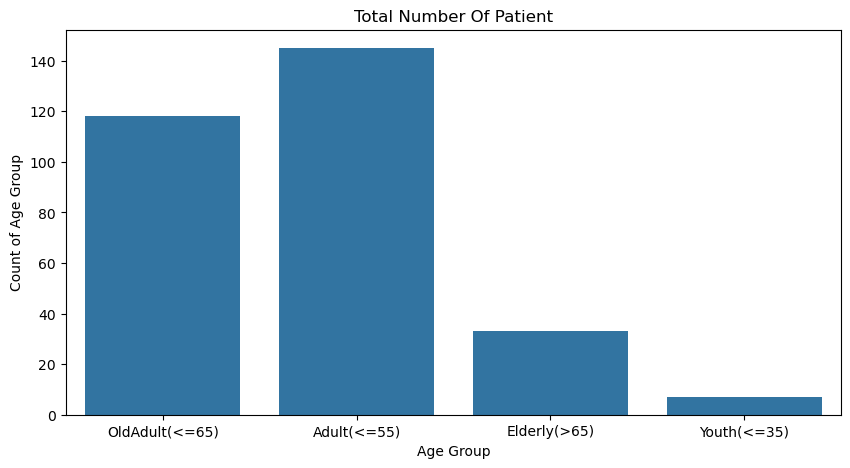

In [28]:
## Investigating the age group of patients
plt.figure(figsize =(10,5))
sns.countplot(x= 'age_bracket',data=data)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number Of Patient')

In [29]:
print(data['age_bracket'].value_counts())

age_bracket
Adult(<=55)       145
OldAdult(<=65)    118
Elderly(>65)       33
Youth(<=35)         7
Name: count, dtype: int64


In [30]:
def gender(sex):
    if sex == 1:
     return "Male"
    else:
     return "Female"

data['gender'] = data['sex'].apply(gender)

In [31]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,OldAdult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,OldAdult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,OldAdult(<=65),Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,OldAdult(<=65),Female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Adult(<=55),Male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Elderly(>65),Male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,OldAdult(<=65),Male


Text(0.5, 1.0, 'Total Number Of Patient')

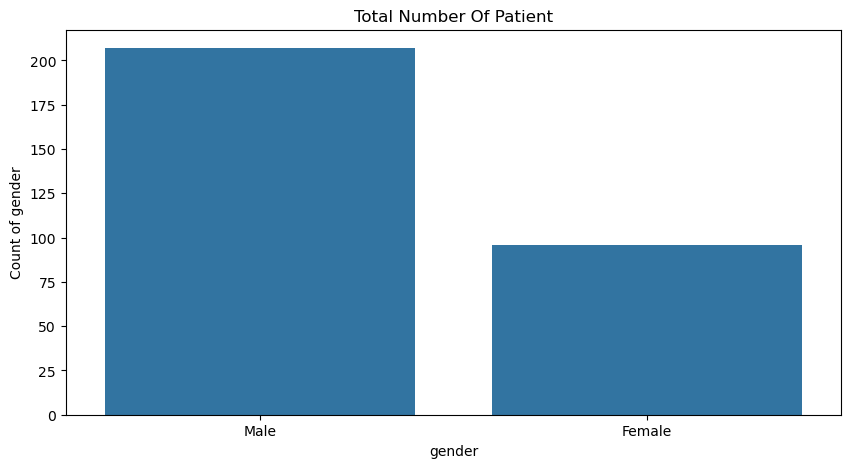

In [32]:
plt.figure(figsize =(10,5))
sns.countplot(x= 'gender',data=data)
plt.xlabel('gender')
plt.ylabel('Count of gender')
plt.title('Total Number Of Patient')

In [33]:
print(data['gender'].value_counts())

gender
Male      207
Female     96
Name: count, dtype: int64


In [34]:
def chest_pain(cp):
    if cp ==1:
     return "typical_angina"
    elif cp == 2:
     return "atypical_anginal"
    elif cp == 3:
     return "non_angina pain"
    else:
     return "asymptomatic"

data['cp'] = data['chest_pain_type'].apply(chest_pain)

In [35]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,OldAdult(<=65),Male,non_angina pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical_anginal
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical_angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,OldAdult(<=65),Male,typical_angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,OldAdult(<=65),Female,asymptomatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,OldAdult(<=65),Female,asymptomatic
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Adult(<=55),Male,non_angina pain
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Elderly(>65),Male,asymptomatic
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,OldAdult(<=65),Male,asymptomatic


Text(0.5, 1.0, 'Total Number Of Patient')

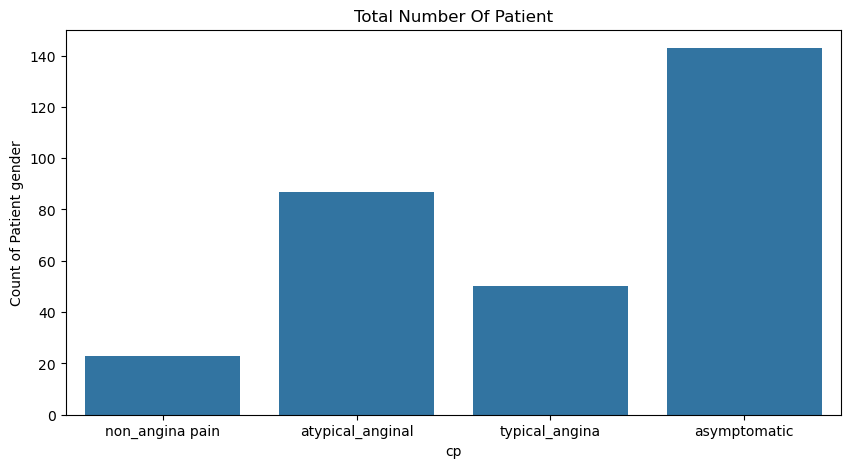

In [36]:
plt.figure(figsize =(10,5))
sns.countplot(x= 'cp',data=data)
plt.xlabel('cp')
plt.ylabel('Count of Patient gender')
plt.title('Total Number Of Patient')

In [37]:
## to do value count 
print(data['cp'].value_counts())

cp
asymptomatic        143
atypical_anginal     87
typical_angina       50
non_angina pain      23
Name: count, dtype: int64


In [38]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_bracket',
       'gender', 'cp'],
      dtype='object')

In [39]:
print(data['fasting_blood_sugar'].value_counts())

fasting_blood_sugar
0    258
1     45
Name: count, dtype: int64


In [40]:
print(data['rest_ecg'].value_counts())

rest_ecg
1    152
0    147
2      4
Name: count, dtype: int64


In [41]:
print(data['exercise_induced_angina'].value_counts())

exercise_induced_angina
0    204
1     99
Name: count, dtype: int64


In [42]:
print(data['st_slope'].value_counts())

st_slope
2    142
1    140
0     21
Name: count, dtype: int64


In [43]:
print(data['num_major_vessels'].value_counts())

num_major_vessels
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


In [44]:
print(data['thalassemia'].value_counts())

thalassemia
2    166
3    117
1     18
0      2
Name: count, dtype: int64


In [45]:
print(data['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


In [46]:
def tg(target):
    if target == 1:
     return "Yes"
    else:
     return "No"

data['tg'] = data['target'].apply(tg)

In [47]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp,tg
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,OldAdult(<=65),Male,non_angina pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical_anginal,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical_angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,OldAdult(<=65),Male,typical_angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,OldAdult(<=65),Female,asymptomatic,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,OldAdult(<=65),Female,asymptomatic,No
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Adult(<=55),Male,non_angina pain,No
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Elderly(>65),Male,asymptomatic,No
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,OldAdult(<=65),Male,asymptomatic,No


In [48]:
print(data["tg"].value_counts())

tg
Yes    165
No     138
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Of Patient')

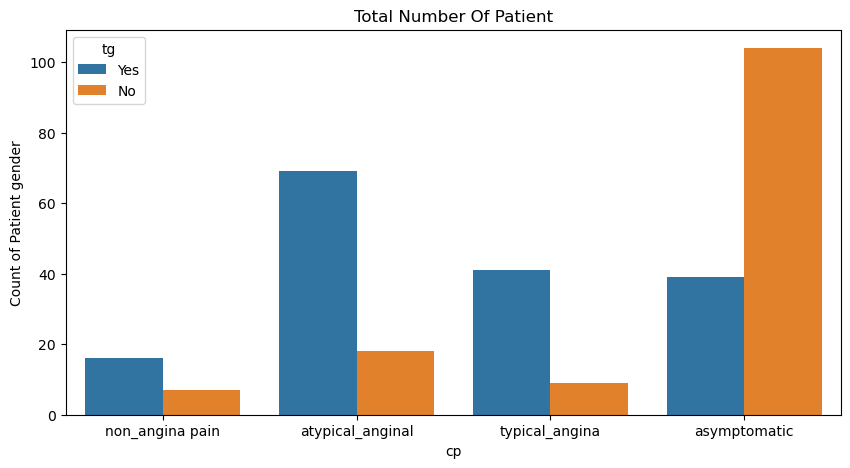

In [49]:
##bivarites analysis

plt.figure(figsize =(10,5))
sns.countplot(x= 'cp',data=data ,hue='tg')
plt.xlabel('cp')
plt.ylabel('Count of Patient gender')
plt.title('Total Number Of Patient')

Text(0.5, 1.0, 'Total Number Of Patient')

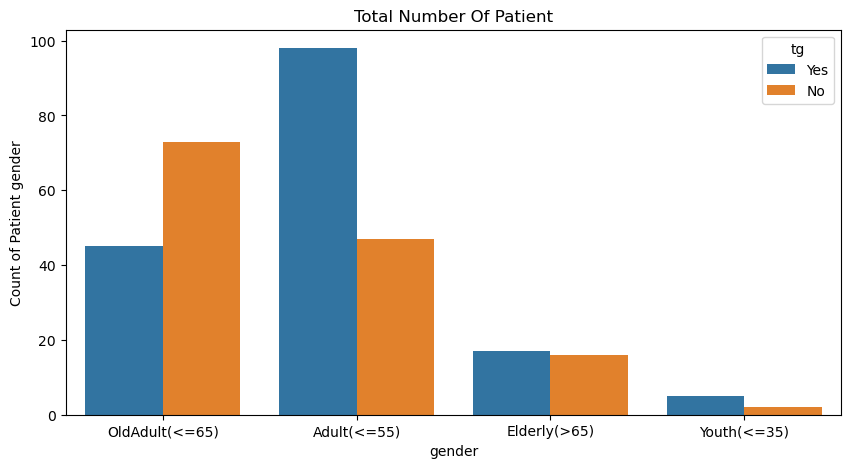

In [50]:
plt.figure(figsize =(10,5))
sns.countplot(x= 'age_bracket',data=data ,hue='tg')
plt.xlabel('gender')
plt.ylabel('Count of Patient gender')
plt.title('Total Number Of Patient')

Text(0.5, 1.0, 'Total Number Of Patient')

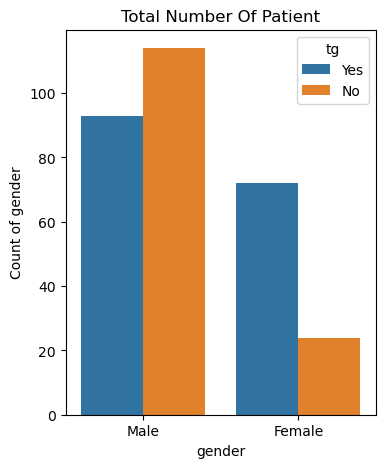

In [51]:
plt.figure(figsize =(4,5))
sns.countplot(x= 'gender',data=data ,hue='tg')
plt.xlabel('gender')
plt.ylabel('Count of gender')
plt.title('Total Number Of Patient')

In [52]:
## Moltivarites Analysis

<Axes: >

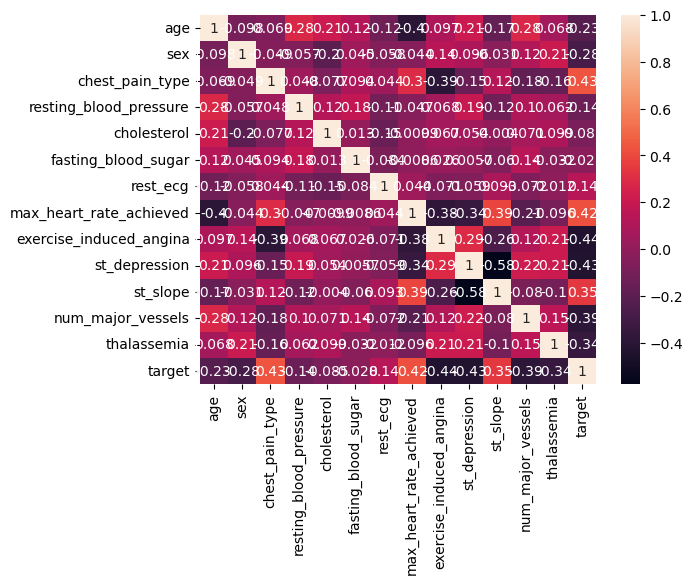

In [53]:
## plt.figure(figsize =(10,10))
sns.heatmap(data.corr(numeric_only=True),cbar=True, annot=True )

### feature Engineering/Data pre-processing

In [54]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_bracket',
       'gender', 'cp', 'tg'],
      dtype='object')

In [55]:
df1 =data[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'rest_ecg','max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia']]

label =data[['target']]

In [56]:
df1

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [57]:
label

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [59]:
## Dealings with outliers check the above boxplot
## Normalization 

In [60]:
# Normalizing the data

scaler= MinMaxScaler()


df1["Scaler_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaler_chol"] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1, 1))
df1["Scaler_thal"] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1, 1))
df1["Scaler_max_heart_rate"] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure','cholesterol','thalassemia','max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaler_RBP,Scaler_chol,Scaler_thal,Scaler_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


In [61]:
## MACHINE LEARNING

In [62]:
X_train ,X_test, y_train , y_test = train_test_split(df1 ,label, test_size=0.2, random_state=42)

In [63]:
X_train

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaler_RBP,Scaler_chol,Scaler_thal,Scaler_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,0,1,0,0.6,1,1,0.433962,0.244292,1.000000,0.702290
71,51,1,2,0,1,1,0.0,2,1,0.000000,0.230594,1.000000,0.633588
106,69,1,3,1,0,0,0.1,1,1,0.622642,0.246575,0.666667,0.458015
270,46,1,0,0,0,0,0.8,2,0,0.245283,0.280822,1.000000,0.557252


In [64]:
y_train

,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [65]:
### MODEL BUILDING

# LOGISTICS REGRESSIONN
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:" ,accuracy_score(y_test,ly_pred))
print("Precision:", precision_score(y_test,ly_pred))
print("Recall:",recall_score(y_test,ly_pred))
print("F1_score:", f1_score(y_test , ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1_score: 0.875
AUC-ROC: 0.8685344827586206


In [66]:
sns.__version__

'0.13.2'

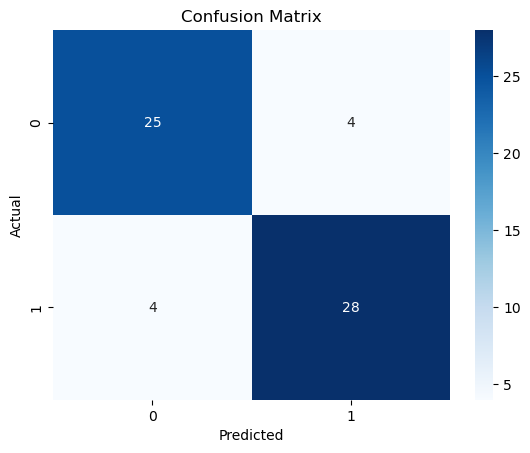

In [67]:
## create Confussion Matrix
cm = confusion_matrix(y_test, ly_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [68]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
## Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest")
print("Accuracy:" ,accuracy_score(y_test,rfc_pred))
print("Precision:", precision_score(y_test,rfc_pred))
print("Recall:",recall_score(y_test,rfc_pred))
print("F1_score:", f1_score(y_test , rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred))

Random Forest
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1_score: 0.8787878787878787
AUC-ROC: 0.8669181034482758


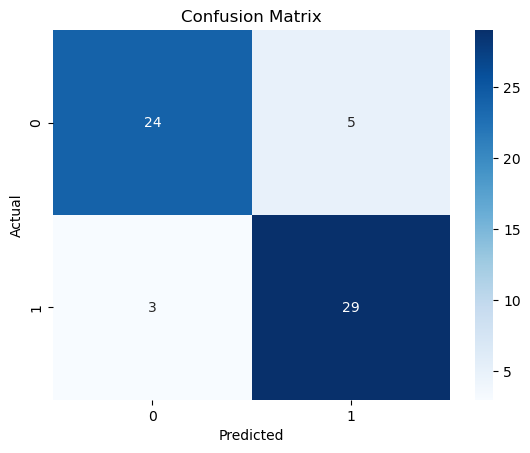

In [70]:
cm = confusion_matrix(y_test, rfc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [71]:
rfc_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
sgd =  SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print(" SGDClassifier")
print("Accuracy:" ,accuracy_score(y_test,sgd_pred))
print("Precision:", precision_score(y_test,sgd_pred))
print("Recall:",recall_score(y_test,sgd_pred))
print("F1_score:", f1_score(y_test , sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))

 SGDClassifier
Accuracy: 0.8688524590163934
Precision: 0.8333333333333334
Recall: 0.9375
F1_score: 0.8823529411764706
AUC-ROC: 0.865301724137931


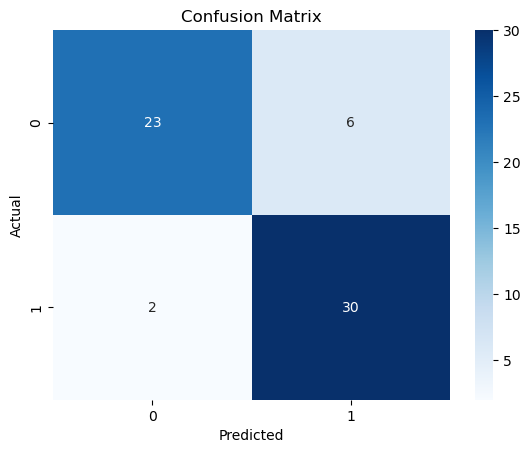

In [88]:
cm = confusion_matrix(y_test, sgd_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues",fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [74]:
sgd_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
knc=KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
print("KNeighborsClassifier")
print("Accuracy:" ,accuracy_score(y_test,knc_pred))
print("Precision:", precision_score(y_test,knc_pred))
print("Recall:",recall_score(y_test,knc_pred))
print("F1_score:", f1_score(y_test , knc_pred))
print("AUC-ROC:", roc_auc_score(y_test, knc_pred))

KNeighborsClassifier
Accuracy: 0.7540983606557377
Precision: 0.7931034482758621
Recall: 0.71875
F1_score: 0.7540983606557378
AUC-ROC: 0.755926724137931


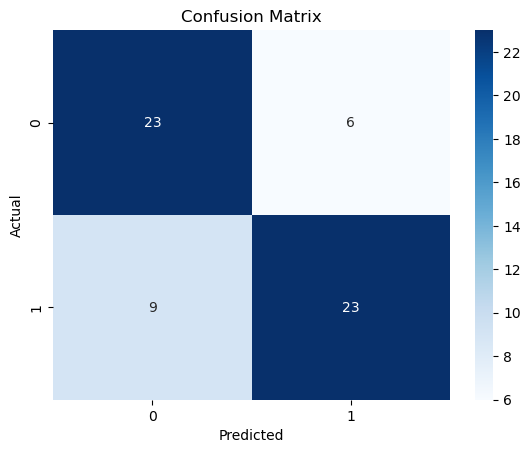

In [76]:
cm = confusion_matrix(y_test, knc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [77]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBClassifier")
print("Accuracy:" ,accuracy_score(y_test,xgb_pred))
print("Precision:", precision_score(y_test,xgb_pred))
print("Recall:",recall_score(y_test,xgb_pred))
print("F1_score:", f1_score(y_test , xgb_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgb_pred))

XGBClassifier
Accuracy: 0.819672131147541
Precision: 0.8620689655172413
Recall: 0.78125
F1_score: 0.8196721311475409
AUC-ROC: 0.8216594827586207


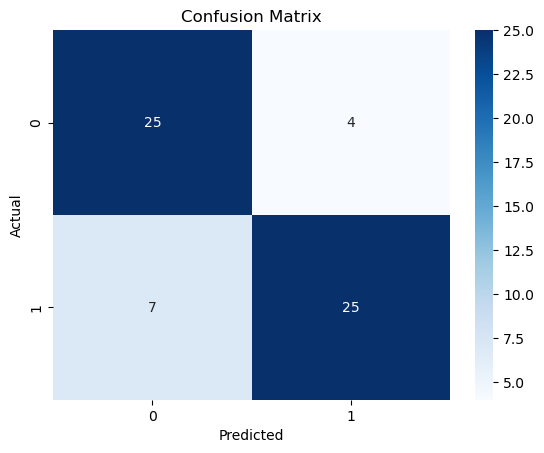

In [78]:
cm = confusion_matrix(y_test, xgb_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [79]:
lsvc=LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_test)
print("LinearSVC")
print("Accuracy:" ,accuracy_score(y_test,lsvc_pred))
print("Precision:", precision_score(y_test,lsvc_pred))
print("Recall:",recall_score(y_test,lsvc_pred))
print("F1_score:", f1_score(y_test , lsvc_pred))
print("AUC-ROC:", roc_auc_score(y_test, lsvc_pred))

LinearSVC
Accuracy: 0.5081967213114754
Precision: 1.0
Recall: 0.0625
F1_score: 0.11764705882352941
AUC-ROC: 0.53125


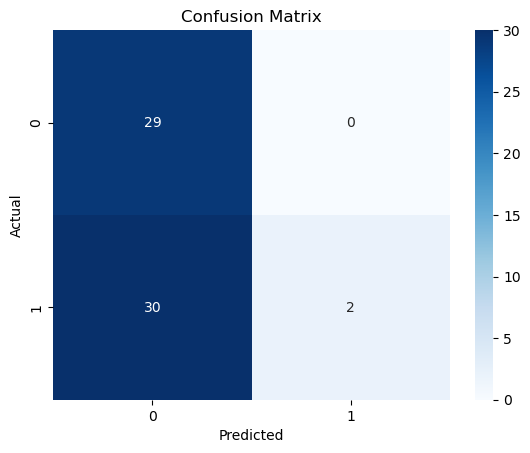

In [80]:
cm = confusion_matrix(y_test, lsvc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [81]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("GaussianNB")
print("Accuracy:" ,accuracy_score(y_test,gnb_pred))
print("Precision:", precision_score(y_test,gnb_pred))
print("Recall:",recall_score(y_test,gnb_pred))
print("F1_score:", f1_score(y_test , gnb_pred))
print("AUC-ROC:", roc_auc_score(y_test, gnb_pred))

GaussianNB
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1_score: 0.870967741935484
AUC-ROC: 0.8701508620689655


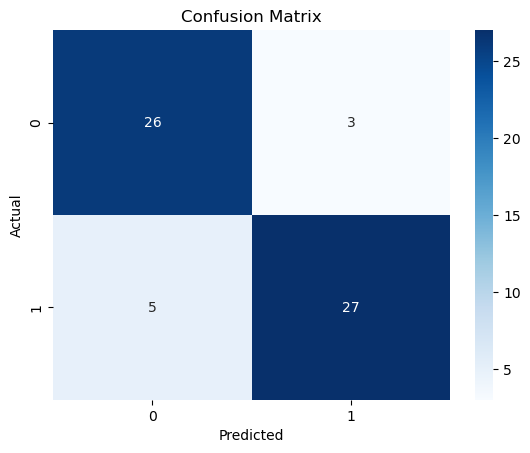

In [82]:
cm = confusion_matrix(y_test, gnb_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [83]:
svc= SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("SVC")
print("Accuracy:" ,accuracy_score(y_test,svc_pred))
print("Precision:", precision_score(y_test,svc_pred))
print("Recall:",recall_score(y_test,svc_pred))
print("F1_score:", f1_score(y_test , svc_pred))
print("AUC-ROC:", roc_auc_score(y_test, svc_pred))

SVC
Accuracy: 0.6557377049180327
Precision: 0.6571428571428571
Recall: 0.71875
F1_score: 0.6865671641791045
AUC-ROC: 0.6524784482758621


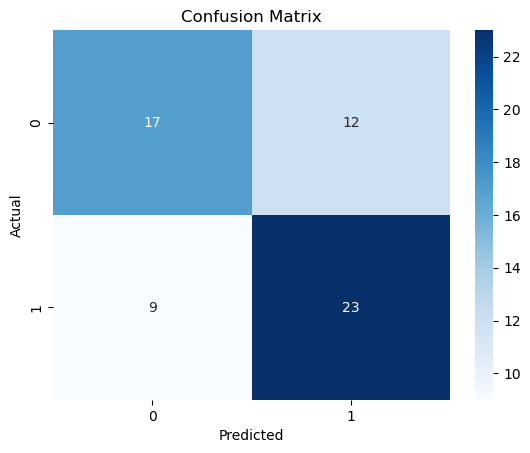

In [84]:
cm = confusion_matrix(y_test, svc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [85]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("DecisionTreeClassifier")
print("Accuracy:" ,accuracy_score(y_test,dtc_pred))
print("Precision:", precision_score(y_test,dtc_pred))
print("Recall:",recall_score(y_test,dtc_pred))
print("F1_score:", f1_score(y_test ,dtc_pred))
print("AUC-ROC:", roc_auc_score(y_test, dtc_pred))

DecisionTreeClassifier
Accuracy: 0.8524590163934426
Precision: 0.9259259259259259
Recall: 0.78125
F1_score: 0.847457627118644
AUC-ROC: 0.8561422413793104


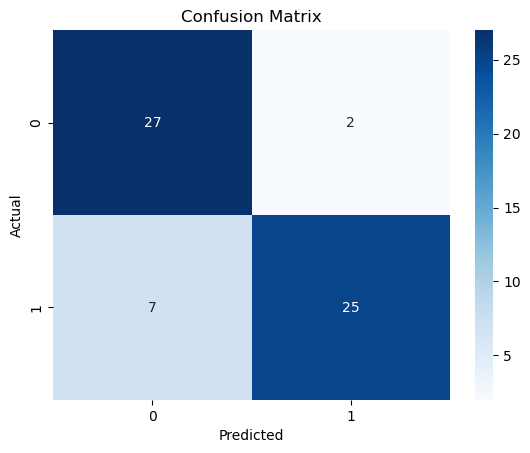

In [86]:
cm = confusion_matrix(y_test, dtc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()